User Engagement Analysis

In [110]:
# Importing the neccesary libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import sys
sys.path.append("..")

from sklearn.cluster import KMeans

In [2]:
engagement_df = pd.read_csv('../data/user_overview_clean_df.csv')
engagement_df.head()

,MSISDN/Number,num_xdr sessions,Start ms,End ms,Start,End,Dur. (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,...,Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL),Total(DL/UL),Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:00,2019-04-25 14:35:00,1823652.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,...,292.426453,17.855187,18.355943,3.701304,2.905912,1.570185,345.629377,47.0,76411.0,67.0
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:00,2019-04-25 08:15:00,1365104.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),...,609.920783,35.565545,39.359124,0.937385,4.414096,1.933278,707.185356,70.0,3728.0,42.0
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:00,2019-04-25 11:58:00,1361762.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),...,229.980251,23.751202,34.425237,3.363124,10.229119,1.726277,307.690973,70.0,0.0,15.0
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:00,2019-04-25 07:36:00,1321509.0,1.321510e+09,undefined,undefined,...,810.387875,15.092588,36.534765,2.070983,11.811761,0.657493,889.352748,70.0,41212.0,88.0
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:00,2019-04-25 10:40:00,1089009.0,1.089009e+09,Samsung,Samsung Sm-G390F,...,531.237049,17.539799,34.222253,2.110349,7.748843,0.912788,607.681403,70.0,0.0,15.0


In [3]:
engagement_df.isna().sum()

MSISDN/Number            0
num_xdr sessions         0
Start ms                 0
End ms                   0
Start                    0
End                      0
Dur. (ms)                0
Dur. (ms).1              0
Handset Manufacturer     0
Handset Type             0
Last Location Name       0
IMSI                     0
IMEI                     0
Total DL (Bytes)         0
Total UL (Bytes          0
Other(UL/DL)             0
Gaming(UL/DL)            0
Netflix(UL/DL)           0
Youtube(UL/DL)           0
Email(UL/DL)             0
Google(UL/DL)            0
Social Media(UL/DL)      0
Total(DL/UL)             0
Avg Delay (ms)           0
Activity_Duration(ms)    0
Avg Throughput (kbps)    0
dtype: int64

In [4]:
engagement_df['sessions frequency'] = engagement_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')


In [5]:
engagement_df['sessions frequency'].head()


0    1
1    1
2    1
3    1
4    2
Name: sessions frequency, dtype: int64

In [6]:
new_df = engagement_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [7]:
new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,345.629377,1823652.0,1
1,3.360100e+10,707.185356,1365104.0,1
2,3.360100e+10,307.690973,1361762.0,1
3,3.360101e+10,889.352748,1321509.0,1
4,3.360101e+10,607.681403,1089009.0,2


In [8]:
# The top 10 customers per duration session
new_df = new_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]
top_dur = new_df[['MSISDN/Number', 'Dur. (ms)']].head(10)

In [9]:
top_dur

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,1823652.0
1,3.360100e+10,1365104.0
2,3.360100e+10,1361762.0
3,3.360101e+10,1321509.0
4,3.360101e+10,1089009.0
5,3.360101e+10,1074638.0
6,3.360101e+10,1035261.0
7,3.360101e+10,951292.0
8,3.360101e+10,941634.0
9,3.360102e+10,864482.0


In [10]:
top_dur.to_csv('../data/top_ten_session_duration.csv')

Top 10 customers per session frequency

In [11]:

new_df.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
top_freq =new_df[['MSISDN/Number', 'sessions frequency']].head(10)

In [12]:
top_freq

,MSISDN/Number,sessions frequency
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.376054e+10,15
5,3.367588e+10,15
6,3.366716e+10,13
7,3.360452e+10,12
8,3.376041e+10,12
9,3.360313e+10,12


In [13]:
top_freq.to_csv('../data/top_ten_session_frequency.csv')

Top 10 customers on Total Downloads and Uploads

In [14]:

new_df.sort_values(by='Total(DL/UL)', ascending=False, inplace=True, ignore_index=True)
top_ul_dl = new_df[['MSISDN/Number', 'Total(DL/UL)']].head(10)

In [15]:
top_ul_dl

,MSISDN/Number,Total(DL/UL)
0,3.366317e+10,955.984776
1,3.366755e+10,952.307464
2,3.367575e+10,951.775502
3,3.366558e+10,949.987157
4,3.361325e+10,949.598255
5,3.366286e+10,949.172538
6,3.363204e+10,948.234086
7,3.367149e+10,947.827452
8,3.369810e+10,947.169694
9,3.366705e+10,947.014951


In [16]:
top_ul_dl.to_csv('../data/top_ten_UL_DL.csv')

In [17]:
engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']].describe()

,Total(DL/UL),Dur. (ms),sessions frequency
count,106471.000000,1.064710e+05,106471.000000
mean,496.124309,9.770374e+04,1.394802
std,244.594950,8.388212e+04,0.806994
min,28.956107,7.142000e+03,1.000000
25%,284.875694,4.197000e+04,1.000000
50%,497.209712,8.639900e+04,1.000000
75%,707.544703,1.234930e+05,2.000000
max,955.984776,1.823652e+06,18.000000


Normaization

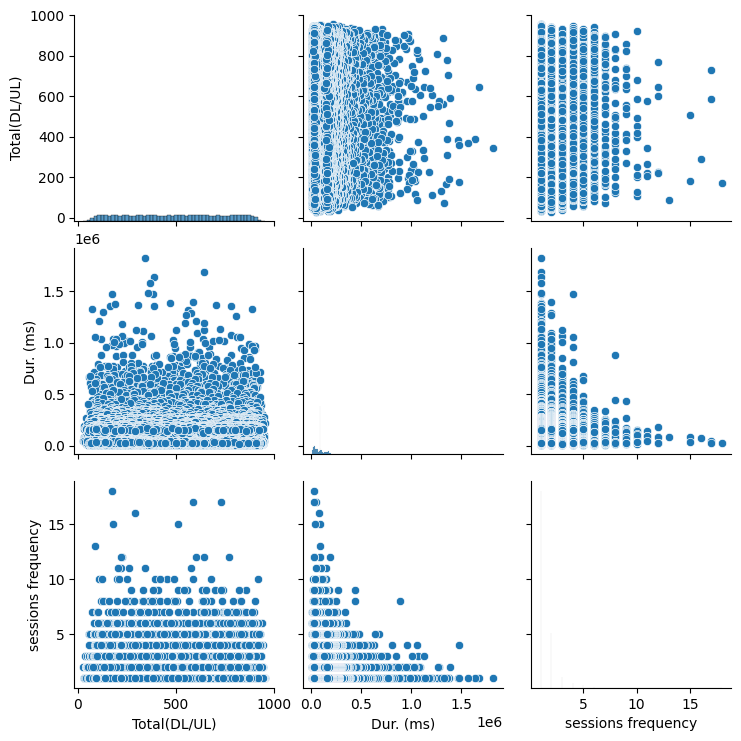

In [18]:
# visualizing columns befor normalization 
import seaborn as sns
%matplotlib inline
sns.pairplot(engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']],palette='set2')

In [19]:
# Noramlizing duration
from sklearn.preprocessing import MinMaxScaler
normalize_column_df = pd.DataFrame(engagement_df['Dur. (ms)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
engagement_df['Dur. (ms)'] = scaled_values

In [20]:
# Normalizing session frequency
normalize_column_df = pd.DataFrame(engagement_df['sessions frequency'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
engagement_df['sessions frequency'] = scaled_values

In [21]:
# Normalizing total DL/UL
normalize_column_df = pd.DataFrame(engagement_df['Total(DL/UL)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
engagement_df['Total(DL/UL)'] = scaled_values

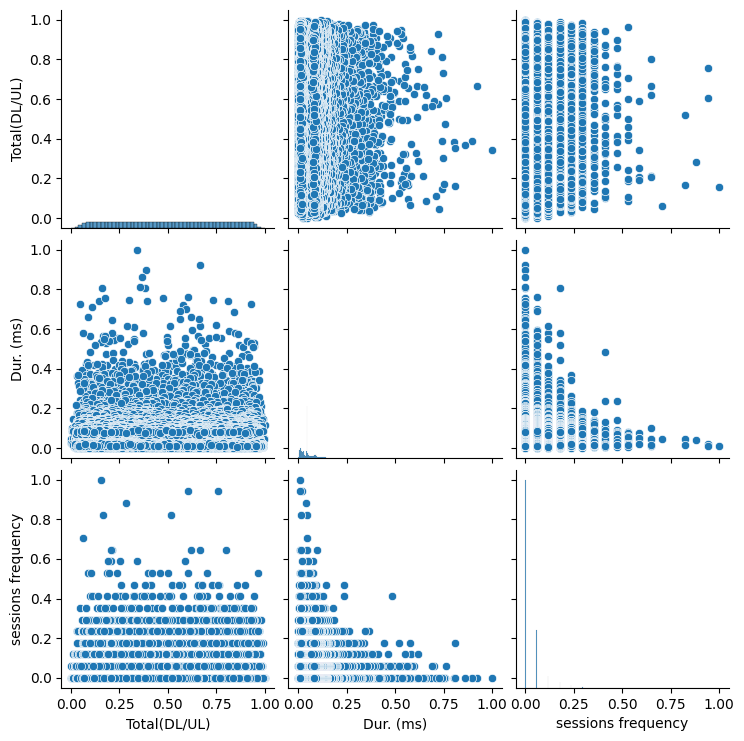

In [22]:
# Columns after normalization
sns.pairplot(engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']],palette='set2')

In [23]:
# description of normalized columns
engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']].describe()

,Total(DL/UL),Dur. (ms),sessions frequency
count,106471.000000,106471.000000,106471.000000
mean,0.503941,0.049855,0.023224
std,0.263848,0.046178,0.047470
min,0.000000,0.000000,0.000000
25%,0.276064,0.019173,0.000000
50%,0.505112,0.043631,0.000000
75%,0.732004,0.064052,0.058824
max,1.000000,1.000000,1.000000


Standardization of columns

In [24]:
eng_df = pd.read_csv('../data/user_overview_clean_df.csv')

In [25]:
eng_df['sessions frequency'] = eng_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')

In [26]:
eng_new_df = eng_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [27]:
eng_new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,345.629377,1823652.0,1
1,3.360100e+10,707.185356,1365104.0,1
2,3.360100e+10,307.690973,1361762.0,1
3,3.360101e+10,889.352748,1321509.0,1
4,3.360101e+10,607.681403,1089009.0,2


In [28]:
from sklearn.preprocessing import StandardScaler
# standardizng total ul/dl
standardized_df = pd.DataFrame(eng_df['Total(DL/UL)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
eng_df['Total(DL/UL)'] = std_data

In [29]:
# standardizing duration
standardized_df = pd.DataFrame(eng_df['Dur. (ms)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
eng_df['Dur. (ms)'] = std_data

In [30]:
# standardizing sessions frequency
standardized_df = pd.DataFrame(eng_df['sessions frequency'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
eng_df['sessions frequency'] = std_data

In [31]:
eng_new_df = eng_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [32]:
eng_new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,-0.615285,20.575975,-0.489228
1,3.360100e+10,0.862904,15.109373,-0.489228
2,3.360100e+10,-0.770393,15.069531,-0.489228
3,3.360101e+10,1.607679,14.589653,-0.489228
4,3.360101e+10,0.456091,11.817893,0.749944


In [33]:
eng_new_df.index = eng_new_df['MSISDN/Number']
eng_new_df = eng_new_df.iloc[:,1:4]

In [34]:
eng_new_df.head()

,Total(DL/UL),Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-0.615285,20.575975,-0.489228
3.360100e+10,0.862904,15.109373,-0.489228
3.360100e+10,-0.770393,15.069531,-0.489228
3.360101e+10,1.607679,14.589653,-0.489228
3.360101e+10,0.456091,11.817893,0.749944


K-Means Clustering

In [35]:
normal_df = engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [36]:
normal_df.head()

,Total(DL/UL),Dur. (ms),sessions frequency
0,0.341600,1.000000,0.000000
1,0.731616,0.747566,0.000000
2,0.300676,0.745727,0.000000
3,0.928123,0.723567,0.000000
4,0.624280,0.595574,0.058824


In [64]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(normal_df)
label = kmeans.predict(normal_df)

In [65]:
df_kclusture = pd.DataFrame(normal_df)
df_kclusture['clusters'] = label

In [66]:
df_kclusture.head(40)

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
0,0.341600,1.000000,0.000000,0
1,0.731616,0.747566,0.000000,1
2,0.300676,0.745727,0.000000,0
3,0.928123,0.723567,0.000000,1
4,0.624280,0.595574,0.058824,2
5,0.815297,0.587663,0.058824,1
6,0.096579,0.565986,0.058824,0
7,0.868589,0.519760,0.000000,1
8,0.943897,0.514444,0.058824,1
9,0.910470,0.471971,0.000000,1


In [67]:
centroids = kmeans.cluster_centers_

In [68]:
centroids

array([[1.97602638e-01, 4.98790570e-02, 2.33807923e-02, 1.00000000e+00],
       [8.07350089e-01, 4.99339739e-02, 2.34133507e-02, 1.60982339e-14],
       [5.02285307e-01, 4.97516163e-02, 2.28788426e-02, 2.00000000e+00]])

In [69]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

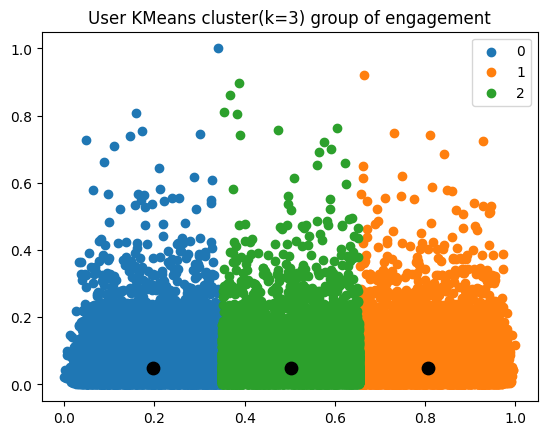

In [70]:
plt.title('User KMeans cluster(k=3) group of engagement')
for i in u_labels:
    plt.scatter(normal_df[label == i].iloc[:,0] , normal_df[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()

MIN,MAX,MEAN and Tota non-normalized metrics

In [44]:
# forming cluster dataframe
cm = pd.DataFrame()
cm['index_d'] = normal_df.index.values
cm['cluster'] = kmeans.labels_

In [45]:
# cluster 1
nor_cluster1 = cm[cm.cluster == 0].iloc[:,0].values.tolist()
cluster_1_df = normal_df.loc[nor_cluster1,:]

In [46]:
# cluster 2
nor_cluster2 = cm[cm.cluster == 1].iloc[:,0].values.tolist()
cluster_2_df = normal_df.loc[nor_cluster2,:]

In [47]:
# cluster 2
nor_cluster3 = cm[cm.cluster == 2].iloc[:,0].values.tolist()
cluster_3_df = normal_df.loc[nor_cluster3,:]

In [48]:
# Description of cluster 1
#cluster_1_df.head()
cluster_1_df.describe()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
count,35681.000000,35681.000000,35681.000000,35681.0
mean,0.807350,0.049934,0.023413,0.0
std,0.088666,0.045804,0.047537,0.0
min,0.654246,0.000002,0.000000,0.0
25%,0.730714,0.019247,0.000000,0.0
50%,0.807831,0.043631,0.000000,0.0
75%,0.882944,0.064905,0.058824,0.0
max,1.000000,0.920816,0.941176,0.0


In [49]:
# Description of cluster 2
cluster_2_df.describe()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
count,35147.000000,35147.000000,35147.000000,35147.0
mean,0.197603,0.049879,0.023381,1.0
std,0.087785,0.046337,0.048204,0.0
min,0.000000,0.000026,0.000000,1.0
25%,0.122188,0.019187,0.000000,1.0
50%,0.197247,0.043631,0.000000,1.0
75%,0.273635,0.063884,0.058824,1.0
max,0.349694,1.000000,1.000000,1.0


In [50]:
# Description of cluster 3
cluster_3_df.describe()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
count,35643.000000,35643.000000,35643.000000,35643.0
mean,0.502285,0.049752,0.022879,2.0
std,0.088249,0.046393,0.046668,0.0
min,0.349589,0.000000,0.000000,2.0
25%,0.425548,0.019078,0.000000,2.0
50%,0.502713,0.043631,0.000000,2.0
75%,0.579113,0.063323,0.058824,2.0
max,0.654410,0.896137,0.941176,2.0


Non-normalized metrics

In [51]:
non_normal_df = pd.read_csv('../data/user_overview_clean_df.csv')

In [52]:
non_normal_df['sessions frequency'] = non_normal_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')

In [53]:
non_normal_df2 = non_normal_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [54]:
non_normal_df2.head()

,Total(DL/UL),Dur. (ms),sessions frequency
0,345.629377,1823652.0,1
1,707.185356,1365104.0,1
2,307.690973,1361762.0,1
3,889.352748,1321509.0,1
4,607.681403,1089009.0,2


In [55]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(non_normal_df2)
label = kmeans.predict(non_normal_df2)

In [56]:
df_kclusture = pd.DataFrame(non_normal_df2)
df_kclusture['clusters'] = label

In [72]:
df_kclusture.head()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
0,0.341600,1.000000,0.000000,0
1,0.731616,0.747566,0.000000,1
2,0.300676,0.745727,0.000000,0
3,0.928123,0.723567,0.000000,1
4,0.624280,0.595574,0.058824,2


In [58]:
centroids = kmeans.cluster_centers_

In [73]:
centroids

array([[1.97602638e-01, 4.98790570e-02, 2.33807923e-02, 1.00000000e+00],
       [8.07350089e-01, 4.99339739e-02, 2.34133507e-02, 1.60982339e-14],
       [5.02285307e-01, 4.97516163e-02, 2.28788426e-02, 2.00000000e+00]])

In [74]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

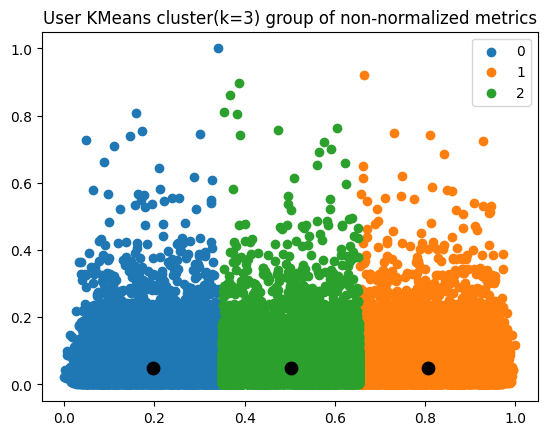

In [78]:
# plot
plt.title('User KMeans cluster(k=3) group of non-normalized metrics')
for i in u_labels:
    plt.scatter(normal_df[label == i].iloc[:,0] , normal_df[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()

Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [76]:
df_agg = pd.read_csv('../data/user_overview_clean_df.csv')

In [79]:
df_agg.head()

,MSISDN/Number,num_xdr sessions,Start ms,End ms,Start,End,Dur. (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,...,Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL),Total(DL/UL),Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:00,2019-04-25 14:35:00,1823652.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,...,292.426453,17.855187,18.355943,3.701304,2.905912,1.570185,345.629377,47.0,76411.0,67.0
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:00,2019-04-25 08:15:00,1365104.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),...,609.920783,35.565545,39.359124,0.937385,4.414096,1.933278,707.185356,70.0,3728.0,42.0
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:00,2019-04-25 11:58:00,1361762.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),...,229.980251,23.751202,34.425237,3.363124,10.229119,1.726277,307.690973,70.0,0.0,15.0
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:00,2019-04-25 07:36:00,1321509.0,1.321510e+09,undefined,undefined,...,810.387875,15.092588,36.534765,2.070983,11.811761,0.657493,889.352748,70.0,41212.0,88.0
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:00,2019-04-25 10:40:00,1089009.0,1.089009e+09,Samsung,Samsung Sm-G390F,...,531.237049,17.539799,34.222253,2.110349,7.748843,0.912788,607.681403,70.0,0.0,15.0


In [80]:
# Top 10 Youtube users
df_agg.sort_values(by=['Youtube(UL/DL)'],ascending=False, inplace=True)
top10_youtube_user=df_agg[['MSISDN/Number', 'Youtube(UL/DL)']].head(10)
top10_youtube_user.to_csv("../data/top_ten_youtube_users.csv",index=False)

In [81]:
top10_youtube_user

,MSISDN/Number,Youtube(UL/DL)
65709,3.366743e+10,45.190078
100814,3.376767e+10,45.179008
15371,3.362967e+10,45.170035
106307,3.378866e+10,45.162724
44706,3.366160e+10,45.108826
13596,3.362649e+10,45.093369
67442,3.366799e+10,45.091533
94009,3.376117e+10,45.074469
54204,3.366390e+10,45.071796
18001,3.363533e+10,45.049792


In [82]:
# Top ten google users
df_agg.sort_values(by=['Google(UL/DL)'],ascending=False, inplace=True)
top10_google_user=df_agg[['MSISDN/Number', 'Google(UL/DL)']].head(10)
top10_google_user.to_csv("../data/top10_google_users.csv",index=False)

In [83]:
top10_google_user

,MSISDN/Number,Google(UL/DL)
91827,3.376023e+10,15.528782
48068,3.366238e+10,15.517324
79967,3.368375e+10,15.508567
26743,3.365091e+10,15.507131
3291,3.360995e+10,15.506449
52342,3.366342e+10,15.506141
81739,3.368729e+10,15.493921
89220,3.369974e+10,15.483654
16538,3.363212e+10,15.481311
73297,3.367055e+10,15.479714


In [84]:
# Top ten email users
df_agg.sort_values(by=['Email(UL/DL)'],ascending=False, inplace=True)
top10_email_user=df_agg[['MSISDN/Number', 'Email(UL/DL)']].head(10)
top10_email_user.to_csv("../data/top10_email_users.csv",index=False)

In [85]:
top10_email_user

,MSISDN/Number,Email(UL/DL)
43183,3.366123e+10,4.518036
87225,3.369913e+10,4.513579
14513,3.362799e+10,4.513000
56377,3.366452e+10,4.512730
28008,3.365196e+10,4.510915
102431,3.377111e+10,4.510178
78290,3.368036e+10,4.507049
43613,3.366135e+10,4.504056
37873,3.365995e+10,4.499429
86582,3.369892e+10,4.497961


In [86]:
# top ten Social media users
df_agg.sort_values(by=['Social Media(UL/DL)'],ascending=False, inplace=True)
top10_socialM_user=df_agg[['MSISDN/Number', 'Social Media(UL/DL)']].head(10)
top10_socialM_user.to_csv("../data/top10_socialMedia_users.csv",index=False)

In [87]:
top10_socialM_user

,MSISDN/Number,Social Media(UL/DL)
31556,3.365857e+10,3.650861
103950,3.378186e+10,3.650240
49531,3.366271e+10,3.648729
96887,3.376218e+10,3.648659
31248,3.365850e+10,3.648092
44811,3.366163e+10,3.648027
11010,3.362234e+10,3.647700
9831,3.362051e+10,3.647486
7357,3.361645e+10,3.647484
73988,3.367185e+10,3.646924


In [88]:
# Top 10 Netflix Users
df_agg.sort_values(by=['Netflix(UL/DL)'],ascending=False, inplace=True)
top10_netflix_user=df_agg[['MSISDN/Number', 'Netflix(UL/DL)']].head(10)
top10_netflix_user.to_csv("../data/top10_netflix_users.csv",index=False)

In [89]:
top10_netflix_user

,MSISDN/Number,Netflix(UL/DL)
59373,3.366533e+10,45.198153
37908,3.365996e+10,45.110360
25327,3.365058e+10,45.064738
71845,3.366945e+10,45.054355
55292,3.366421e+10,45.012951
54130,3.366388e+10,44.998954
18046,3.363539e+10,44.983646
85542,3.369860e+10,44.970634
26461,3.365084e+10,44.915543
5057,3.361276e+10,44.903323


In [90]:
# Top ten Gaming Users
df_agg.sort_values(by=['Gaming(UL/DL)'],ascending=False, inplace=True)
top10_game_user=df_agg[['MSISDN/Number', 'Gaming(UL/DL)']].head(10)
top10_game_user.to_csv("../data/top10_gameApp_users.csv",index=False)


In [91]:
top10_game_user

,MSISDN/Number,Gaming(UL/DL)
81238,3.368632e+10,859.202784
75544,3.367484e+10,859.010933
2880,3.360926e+10,858.902084
43599,3.366134e+10,858.735183
65604,3.366740e+10,858.652760
11554,3.362321e+10,858.562729
27750,3.365163e+10,858.506410
71121,3.366920e+10,858.367124
27372,3.365124e+10,858.199677
45644,3.366183e+10,858.153696


In [92]:
# Top ten Other media users
df_agg.sort_values(by=['Other(UL/DL)'],ascending=False, inplace=True)
top10_other_user=df_agg[['MSISDN/Number', 'Other(UL/DL)']].head(10)
top10_other_user.to_csv("../data/top10_otherAct_users.csv",index=False)

In [94]:
top10_other_user

,MSISDN/Number,Other(UL/DL)
102967,3.377802e+10,859.520934
85711,3.369867e+10,859.485577
101437,3.376898e+10,859.285331
86316,3.369884e+10,859.188885
35393,3.365938e+10,859.053653
23507,3.365016e+10,858.926613
96405,3.376197e+10,858.874743
82575,3.368904e+10,858.849565
18026,3.363536e+10,858.787718
49229,3.366264e+10,858.555595


Most Used Applications

In [95]:
df_agg.head()

,MSISDN/Number,num_xdr sessions,Start ms,End ms,Start,End,Dur. (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,...,Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL),Total(DL/UL),Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
102967,3.377802e+10,2,856.0,929.0,2019-04-27 08:41:00,2019-04-29 08:46:00,173097.0,173097073.0,Samsung,Samsung Galaxy S8 (Sm-G950F),...,692.932960,16.042093,30.738339,2.619031,3.800935,2.213932,764.635266,26.0,32885.0,92.0
85711,3.369867e+10,1,361.0,769.0,2019-04-27 12:19:00,2019-04-28 00:08:00,42571.0,42571408.0,Lenovo,Lenovo Nexus 6 Valocia,...,112.240199,19.857511,26.634466,3.407370,8.470152,0.715729,187.781335,39.0,506792.0,7978.0
101437,3.376898e+10,2,372.0,912.0,2019-04-26 19:17:00,2019-04-29 06:26:00,212967.0,212967540.0,Samsung,Samsung Galaxy Note 8 (Sm-N950F),...,810.692273,37.188952,12.127930,3.111951,2.532434,0.986213,882.811038,39.0,0.0,15.0
86316,3.369884e+10,1,840.0,845.0,2019-04-27 12:41:00,2019-04-28 00:26:00,42329.0,42329005.0,Apple,Apple iPhone X (A1901),...,36.851369,18.607836,28.165993,2.745798,7.301393,0.361385,110.391165,85.0,126875.0,2703.0
35393,3.365938e+10,1,511.0,432.0,2019-04-25 01:30:00,2019-04-26 01:30:00,86399.0,86399921.0,Huawei,Huawei B528S-23A,...,814.693830,13.135363,14.286195,1.550181,10.206974,1.661635,871.939456,83.0,10457657.0,56647.0


In [97]:
selected_apps = df_agg[['Youtube(UL/DL)','Google(UL/DL)','Email(UL/DL)',
                'Social Media(UL/DL)','Netflix(UL/DL)','Gaming(UL/DL)', 'Other(UL/DL)']]
selected_apps.head()

,Youtube(UL/DL),Google(UL/DL),Email(UL/DL),Social Media(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL)
102967,30.738339,3.800935,2.619031,2.213932,16.042093,692.932960,859.520934
85711,26.634466,8.470152,3.407370,0.715729,19.857511,112.240199,859.485577
101437,12.127930,2.532434,3.111951,0.986213,37.188952,810.692273,859.285331
86316,28.165993,7.301393,2.745798,0.361385,18.607836,36.851369,859.188885
35393,14.286195,10.206974,1.550181,1.661635,13.135363,814.693830,859.053653


In [98]:
cols_sum = selected_apps.sum(axis=0)

In [102]:
# Top 3 frequently used apps
df_app = pd.DataFrame({'Application':cols_sum.index, 'Total Data used':cols_sum.values})
df_app.sort_values(by=['Total Data used'],ascending=False, inplace=True)
indx = df_apps[df_apps['Application'] == 'Other_Total_Data'].index
df_apps = df_app.head(4)
indx = df_apps[df_apps['Application'] == 'Other(UL/DL)'].index
df_apps.drop(indx,inplace=True)

/tmp/ipykernel_194013/4001876253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps.drop(indx,inplace=True)


In [103]:
df_apps

,Application,Total Data used
5,Gaming(UL/DL),4.585869e+07
4,Netflix(UL/DL),2.410370e+06
0,Youtube(UL/DL),2.407761e+06


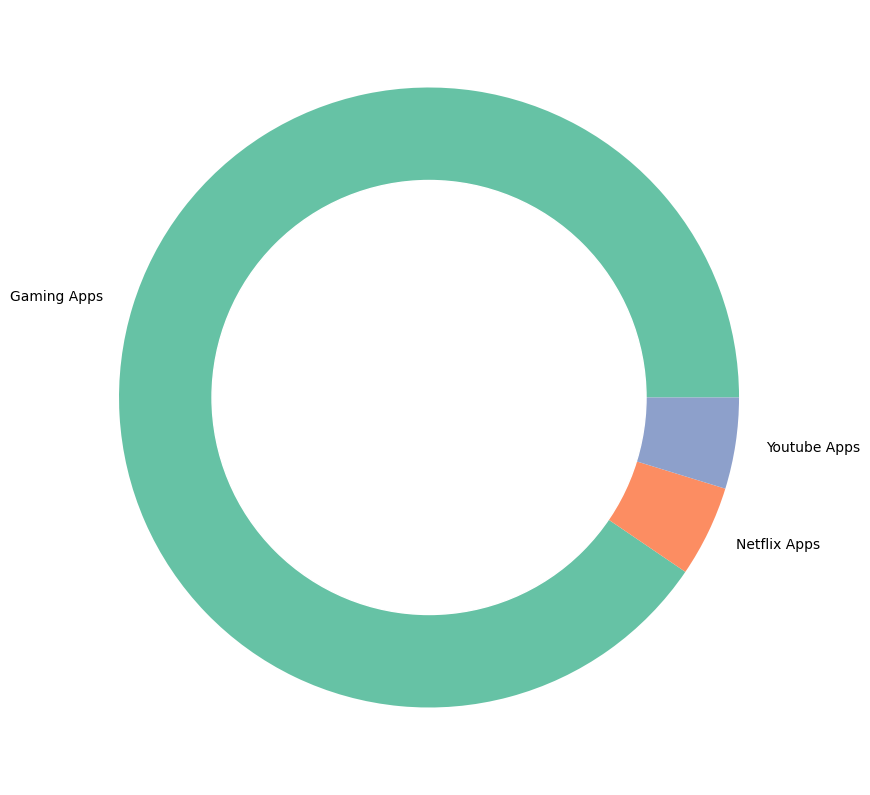

In [109]:
data = df_apps['Total Data used'].tolist()
#explode = [0.5,0.08,0.39]
labels = ['Gaming Apps', 'Netflix Apps', 'Youtube Apps']
colors = sns.color_palette('Set2')
plt.figure(figsize=(10,30))
plt.pie(data, labels=labels,colors=colors)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


K-means for Standardized Data

In [111]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(eng_new_df )
    sse.append(kmeans.inertia_)

In [115]:
!pip install --upgrade kneed

In [116]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

5

In [117]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(eng_new_df)
centroids = kmeans.cluster_centers_
#Getting index based on clusters
u_labels = np.unique(label)

In [118]:
eng_new_df['cluster'] = label
eng_new_df.to_csv('../data/std_engagement.csv')

In [119]:
eng_new_df.head()

,Total(DL/UL),Dur. (ms),sessions frequency,cluster
MSISDN/Number,,,,
3.360100e+10,-0.615285,20.575975,-0.489228,3
3.360100e+10,0.862904,15.109373,-0.489228,3
3.360100e+10,-0.770393,15.069531,-0.489228,3
3.360101e+10,1.607679,14.589653,-0.489228,3
3.360101e+10,0.456091,11.817893,0.749944,3


In [120]:
centroids


array([[-0.90609757, -0.32160531, -0.22141477],
       [ 0.8929404 , -0.32301007, -0.22130865],
       [ 0.01095246,  1.32658434, -0.20553584],
       [-0.00889588,  5.43825118, -0.0185909 ],
       [ 0.01225584, -0.03585663,  2.85475318]])

In [ ]:
centroids_df = pd.DataFrame(centroids, columns=['Total(DL/UL)', 'Dur. (ms)','sessions frequency'])
centroids_df.to_csv('../data/centero_engagment.csv')

In [121]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(eng_new_df)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

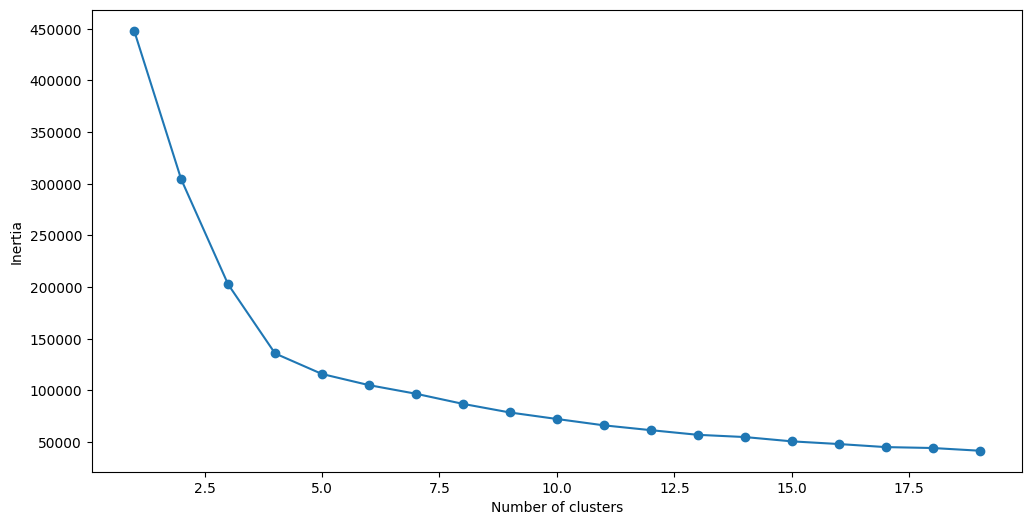

In [122]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')